In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = None
pd.options.display.max_rows = None

pd.options.display.max_colwidth= None

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from gensim import corpora, models
import gensim
import nltk
##nltk.download("stopwords")




# Visualizations
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns
import re


import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim

In [3]:
df = pd.read_csv("reviews.csv", sep = ",")
df.head()

,Review Title,Rating,Review Body
0,One of the best innovation from apple,5.0 out of 5 stars,"\nGreat phone with perfect camera quality , battery life is 100 no over heating charging 8s decent.Best in stability.Brightness is good.Certainly awesome\n"
1,Just amazing!,5.0 out of 5 stars,"\nJust amazing product. Actually I like to purchase online products but as it's so expensive, I tried to purchase from local store in Barasat but they told me 8 thousand more than online price (Only phone's price)😀 even without charger, screen protector and back cover.I got it on online with everything only ₹1,52,000. Although it was a little difficult to buy, as you know it is not easy to transfer the higher amounts within short time. 😀However, Thanks to Amazon team and specially thanks to my IDOL ""Steve Jobs"" 🙏🤗\n"
2,good,5.0 out of 5 stars,\nso lagg cant even play hill climb racing smoothly . dont waste money . nokia is better buy nokia 11 pro max that can run everything smoothly\n
3,Super beautiful,5.0 out of 5 stars,\n\n\n\n\n The media could not be loaded.\n \n\n\n\nPhone is just amazing and\n
4,Best camera quality,5.0 out of 5 stars,NaN


In [4]:
train = df
train.shape

(87, 3)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review Title  87 non-null     object
 1   Rating        87 non-null     object
 2   Review Body   81 non-null     object
dtypes: object(3)
memory usage: 2.2+ KB


In [6]:
type(train['Review Body'])

pandas.core.series.Series

In [7]:
train['Review Body'].head()

0                                                                                                                                                                                                                                                                                                                                                                                  \nGreat phone with perfect camera quality , battery life is 100 no over heating charging 8s decent.Best in stability.Brightness is good.Certainly awesome\n
1    \nJust amazing product. Actually I like to purchase online products but as it's so expensive, I tried to purchase from local store in Barasat but they told me 8 thousand more than online price (Only phone's price)😀 even without charger, screen protector and back cover.I got it on online with everything only ₹1,52,000. Although it was a little difficult to buy, as you know it is not easy to transfer the higher amounts within short time. 😀However, Thanks to Amazon t

In [8]:
#Cleaning Data
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def clean_text(text):
    ps = PorterStemmer()
    text1 = re.sub(r"^https?:\/\/.*[\r\n]*", "", text)
    print(text1)
    text_cleaned = " ".join([x for x in text1 if x not in string.punctuation])
    print(text_cleaned)
    text_cleaned = text_cleaned.lower()
    print(text_cleaned)
    text_cleaned = text_cleaned.split(" ")
    print(text_cleaned)
    text_tokens = [token for token in text_cleaned if token not in stopwords]
    stem_words = [ps.stem(stem) for stem in text_tokens]
    text = " ".join(stem_words)
    text_cleaned = re.sub(' +', ' ', text)
    return text_cleaned    

In [9]:
# train['cleaned'] = train['Review Body'].apply(lambda x: re.sub("\n+"," ", x))
train['cleaned'] = train['Review Body'].apply(lambda x: re.sub("\n+", " ", str(x)) if pd.notnull(x) else x)

In [10]:
train['cleaned'].head(5)

0                                                                                                                                                                                                                                                                                                                                                                                   Great phone with perfect camera quality , battery life is 100 no over heating charging 8s decent.Best in stability.Brightness is good.Certainly awesome 
1     Just amazing product. Actually I like to purchase online products but as it's so expensive, I tried to purchase from local store in Barasat but they told me 8 thousand more than online price (Only phone's price)😀 even without charger, screen protector and back cover.I got it on online with everything only ₹1,52,000. Although it was a little difficult to buy, as you know it is not easy to transfer the higher amounts within short time. 😀However, Thanks to Amazon team

In [11]:
train['cleaned'].tolist()

[' Great phone with perfect camera quality , battery life is 100 no over heating charging 8s decent.Best in stability.Brightness is good.Certainly awesome ',
 ' Just amazing product. Actually I like to purchase online products but as it\'s so expensive, I tried to purchase from local store in Barasat but they told me 8 thousand more than online price (Only phone\'s price)😀 even without charger, screen protector and back cover.I got it on online with everything only ₹1,52,000. Although it was a little difficult to buy, as you know it is not easy to transfer the higher amounts within short time. 😀However, Thanks to Amazon team and specially thanks to my IDOL "Steve Jobs" 🙏🤗 ',
 ' so lagg cant even play hill climb racing smoothly . dont waste money . nokia is better buy nokia 11 pro max that can run everything smoothly ',
 '                     The media could not be loaded.                  Phone is just amazing and ',
 nan,
 ' Nothing to dislike battery life is too goodLove the lookBest

In [12]:
train['cleaned'] = train['cleaned'].str.replace(r'\s+', ' ', regex=True)



train['cleaned'] = train['cleaned'].str.replace(r'[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
train['cleaned'] = train['cleaned'].replace(r'\.','', regex=True)
train['cleaned'] = train['cleaned'].replace(',','.', regex=True)
train['cleaned'].tolist()

[' Great phone with perfect camera quality . battery life is 100 no over heating charging 8s decentBest in stabilityBrightness is goodCertainly awesome ',
 ' Just amazing product Actually I like to purchase online products but as it\'s so expensive. I tried to purchase from local store in Barasat but they told me 8 thousand more than online price (Only phone\'s price)😀 even without charger. screen protector and back coverI got it on online with everything only ₹1.52.000 Although it was a little difficult to buy. as you know it is not easy to transfer the higher amounts within short time 😀However. Thanks to Amazon team and specially thanks to my IDOL "Steve Jobs" 🙏🤗 ',
 ' so lagg cant even play hill climb racing smoothly  dont waste money  nokia is better buy nokia 11 pro max that can run everything smoothly ',
 ' The media could not be loaded Phone is just amazing and ',
 nan,
 ' Nothing to dislike battery life is too goodLove the lookBest camera fetureThis worth the money no regret ✌️

In [13]:
train['cleaned'] = train['cleaned'].apply(lambda x:re.sub(r'#[\w]+', '', str(x)) if pd.notnull(x) else x)

In [14]:
train['cleaned'].head()

0                                                                                                                                                                                                                                                                                                                                                                                  Great phone with perfect camera quality . battery life is 100 no over heating charging 8s decentBest in stabilityBrightness is goodCertainly awesome 
1     Just amazing product Actually I like to purchase online products but as it's so expensive. I tried to purchase from local store in Barasat but they told me 8 thousand more than online price (Only phone's price)😀 even without charger. screen protector and back coverI got it on online with everything only ₹1.52.000 Although it was a little difficult to buy. as you know it is not easy to transfer the higher amounts within short time 😀However. Thanks to Amazon team and spe

In [15]:
train['cleaned']=train['cleaned'].apply(lambda cleaned_review:"".join([x for x in str(cleaned_review) if x not in string.punctuation]))

In [16]:
train['cleaned'].head()

0                                                                                                                                                                                                                                                                                                                                                                       Great phone with perfect camera quality  battery life is 100 no over heating charging 8s decentBest in stabilityBrightness is goodCertainly awesome 
1     Just amazing product Actually I like to purchase online products but as its so expensive I tried to purchase from local store in Barasat but they told me 8 thousand more than online price Only phones price😀 even without charger screen protector and back coverI got it on online with everything only ₹152000 Although it was a little difficult to buy as you know it is not easy to transfer the higher amounts within short time 😀However Thanks to Amazon team and specially thanks to my ID

In [17]:
train['cleaned']=train['cleaned'].apply(lambda x:x.lower())

In [18]:
train['cleaned'].head()

0                                                                                                                                                                                                                                                                                                                                                                       great phone with perfect camera quality  battery life is 100 no over heating charging 8s decentbest in stabilitybrightness is goodcertainly awesome 
1     just amazing product actually i like to purchase online products but as its so expensive i tried to purchase from local store in barasat but they told me 8 thousand more than online price only phones price😀 even without charger screen protector and back coveri got it on online with everything only ₹152000 although it was a little difficult to buy as you know it is not easy to transfer the higher amounts within short time 😀however thanks to amazon team and specially thanks to my id

In [19]:
import string
def removePunct(text):
    text = text.translate(str.maketrans({key: " {0} ".format(key) for key in string.punctuation}))
    
    text_cleaned="".join([x for x in text if x not in string.punctuation])
    text_cleaned=re.sub(r'[^\x00-\x7F]+',' ', text_cleaned) ## Remove Ascii Characters
    text_cleaned=re.sub(r'\s+', ' ', text_cleaned).strip()
    return text_cleaned

In [20]:
train['cleaned']=train['cleaned'].apply(lambda x:removePunct(x))
train.head()

,Review Title,Rating,Review Body,cleaned
0,One of the best innovation from apple,5.0 out of 5 stars,"\nGreat phone with perfect camera quality , battery life is 100 no over heating charging 8s decent.Best in stability.Brightness is good.Certainly awesome\n",great phone with perfect camera quality battery life is 100 no over heating charging 8s decentbest in stabilitybrightness is goodcertainly awesome
1,Just amazing!,5.0 out of 5 stars,"\nJust amazing product. Actually I like to purchase online products but as it's so expensive, I tried to purchase from local store in Barasat but they told me 8 thousand more than online price (Only phone's price)😀 even without charger, screen protector and back cover.I got it on online with everything only ₹1,52,000. Although it was a little difficult to buy, as you know it is not easy to transfer the higher amounts within short time. 😀However, Thanks to Amazon team and specially thanks to my IDOL ""Steve Jobs"" 🙏🤗\n",just amazing product actually i like to purchase online products but as its so expensive i tried to purchase from local store in barasat but they told me 8 thousand more than online price only phones price even without charger screen protector and back coveri got it on online with everything only 152000 although it was a little difficult to buy as you know it is not easy to transfer the higher amounts within short time however thanks to amazon team and specially thanks to my idol steve jobs
2,good,5.0 out of 5 stars,\nso lagg cant even play hill climb racing smoothly . dont waste money . nokia is better buy nokia 11 pro max that can run everything smoothly\n,so lagg cant even play hill climb racing smoothly dont waste money nokia is better buy nokia 11 pro max that can run everything smoothly
3,Super beautiful,5.0 out of 5 stars,\n\n\n\n\n The media could not be loaded.\n \n\n\n\nPhone is just amazing and\n,the media could not be loaded phone is just amazing and
4,Best camera quality,5.0 out of 5 stars,NaN,nan


In [21]:
tokenizer = RegexpTokenizer(r'\w+')

In [22]:
train1 = train.cleaned[0]

In [23]:
tokens = tokenizer.tokenize(train1.lower())

In [24]:
print('{} characters in string vs {} words in a list'.format(len(train1),len(tokens)))
print(tokens[:10])

146 characters in string vs 21 words in a list
['great', 'phone', 'with', 'perfect', 'camera', 'quality', 'battery', 'life', 'is', '100']


In [25]:
import nltk
nltk.download('stopwords')
nltk_stpwd = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
print(len(set(nltk_stpwd)))
print(nltk_stpwd[:10])

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [27]:
stopped_tokens = [token for token in tokens if not token in nltk_stpwd]
print(stopped_tokens[:10])

['great', 'phone', 'perfect', 'camera', 'quality', 'battery', 'life', '100', 'heating', 'charging']


In [41]:
sb_stemmer = SnowballStemmer('english') #snowball stemmer is a more advanced stemming algorithm than the simpler Porter stemmer.
# example 
# Stem a list of words
# words = ["running", "jumped", "walking", "talked"]
# stems = [stemmer.stem(word) for word in words]
# print(stems)  # Output: ['run', 'jump', 'walk', 'talk']

In [29]:
stemmed_tokens = [sb_stemmer.stem(token) for token in stopped_tokens]
print(stemmed_tokens)

['great', 'phone', 'perfect', 'camera', 'qualiti', 'batteri', 'life', '100', 'heat', 'charg', '8s', 'decentbest', 'stabilitybright', 'goodcertain', 'awesom']


In [30]:
num_reviews = df.shape[0]
doc_set = [train.cleaned[i] for i in range(num_reviews)]

In [31]:
texts = []

for doc in doc_set:
    tokens = tokenizer.tokenize(doc.lower())
    stopped_tokens = [token for token in tokens if not token in nltk_stpwd]
    stemmed_tokens = [sb_stemmer.stem(token) for token in stopped_tokens]
    texts.append(stemmed_tokens)
    
print(texts[1])

['amaz', 'product', 'actual', 'like', 'purchas', 'onlin', 'product', 'expens', 'tri', 'purchas', 'local', 'store', 'barasat', 'told', '8', 'thousand', 'onlin', 'price', 'phone', 'price', 'even', 'without', 'charger', 'screen', 'protector', 'back', 'coveri', 'got', 'onlin', 'everyth', '152000', 'although', 'littl', 'difficult', 'buy', 'know', 'easi', 'transfer', 'higher', 'amount', 'within', 'short', 'time', 'howev', 'thank', 'amazon', 'team', 'special', 'thank', 'idol', 'steve', 'job']


In [32]:
texts_dict = corpora.Dictionary(texts)
texts_dict.save('elec_review.dict') 
print(texts_dict)

Dictionary<980 unique tokens: ['100', '8s', 'awesom', 'batteri', 'camera']...>


In [33]:
import operator

texts_dict.filter_extremes(no_below=30, no_above=0.15) # inlace filter
print(texts_dict)
print("top terms:")
print(sorted(texts_dict.token2id.items(), key=operator.itemgetter(1), reverse = False)[:10])

Dictionary<0 unique tokens: []>
top terms:
[]


In [34]:
corpus = [texts_dict.doc2bow(text) for text in texts]
len(corpus)

87

In [35]:
%%time
gensim.corpora.MmCorpus.serialize('vivomobiles.mm', corpus)

CPU times: total: 0 ns
Wall time: 1e+03 µs


In [36]:
# import streamlit as st
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


def sentiBotAnalyzer(input):
    sentiment = SentimentIntensityAnalyzer()
    statement = sentiment.polarity_scores(input)

    return  statement['pos'], statement['neg'], statement['neu'], statement['compound']

def analyzeCompound(comp):
    x, y, z, comp = sentiBotAnalyzer(comp)
    if comp < 0:
        return "Negative"
    elif 0 <= comp <= 0.4:
        return "Neutral"
    elif 0.4 < comp:
        return "Postive"

In [37]:
train['sentiment'] = train['cleaned'].apply(lambda x: analyzeCompound(x)) 

In [38]:
train.sample(10)

,Review Title,Rating,Review Body,cleaned,sentiment
41,Very light,5.0 out of 5 stars,\nBest performance smartphoneValue for moneyVery light phoneNo heating issuesBest phone if no budget problem for sure\n,best performance smartphonevalue for moneyvery light phoneno heating issuesbest phone if no budget problem for sure,Postive
39,Love this pro max,5.0 out of 5 stars,\nbest iphone ever used\n,best iphone ever used,Postive
29,"Worth every penny, awesome battery life",5.0 out of 5 stars,"\nIf you already have 14 Pro or Pro Max then don't upgrade, but if you've any other Pro or non Pro models go for it. If you need an iPhone with 24-26hr battery life on a single charge then go for Pro Max models. No doubt Apple's 4K 60fps ProRes is really awesome, and the all new type-c port is the best thing Apple has done in years. Also all the type-c cables included in the box are woven design, now expecting this will not turn grey after few months of use.\n",if you already have 14 pro or pro max then dont upgrade but if youve any other pro or non pro models go for it if you need an iphone with 2426hr battery life on a single charge then go for pro max models no doubt apples 4k 60fps prores is really awesome and the all new typec port is the best thing apple has done in years also all the typec cables included in the box are woven design now expecting this will not turn grey after few months of use,Postive
45,Best budget Camera mobile under this price must buy fir good performance,5.0 out of 5 stars,\nNice Phn bought under very good price Super sleek nice handy vulnerable best rate so budget in hatts of to apple for making value products\n,nice phn bought under very good price super sleek nice handy vulnerable best rate so budget in hatts of to apple for making value products,Postive
44,Nice phone.,5.0 out of 5 stars,\nI have purchased natural titanium and it's really awesome. My first phone purchased with my hardwork. Didn't sold my kidney for it 😂😂\n,i have purchased natural titanium and its really awesome my first phone purchased with my hardwork didnt sold my kidney for it,Postive
73,Good phone but quality is bad,1.0 out of 5 stars,\nDon't buy waste of money otherwise take samsung s25 ultra in so rich it is so because I buy it don't buy\n,dont buy waste of money otherwise take samsung s25 ultra in so rich it is so because i buy it dont buy,Postive
16,Real Pro phone,5.0 out of 5 stars,"\nA17 Pro , 3Nm ,Ray tracing , 5x zoom nailed it completely. A truly freaking flagship mobile so far. iOs 18 will make it more powerful.\n",a17 pro 3nm ray tracing 5x zoom nailed it completely a truly freaking flagship mobile so far ios 18 will make it more powerful,Postive
78,Defective product,1.0 out of 5 stars,\nGot a defective product where the camera doest load\n,got a defective product where the camera doest load,Negative
62,Packing is bad,4.0 out of 5 stars,\nPacking is bad. There's a tampered package within a new package. The tampered package contained the phone. But the phone is looking good\n,packing is bad theres a tampered package within a new package the tampered package contained the phone but the phone is looking good,Neutral
55,Better than the last Apple Flagship!,5.0 out of 5 stars,\nGot the info it is in stock from X (twitter). Usually always unavailable.Premium phone from a premium company. Original product.\n,got the info it is in stock from x twitter usually always unavailablepremium phone from a premium company original product,Neutral


In [39]:
from collections import Counter
import seaborn as sns

Text(0.5, 1.0, 'Distribution of Sentiment')

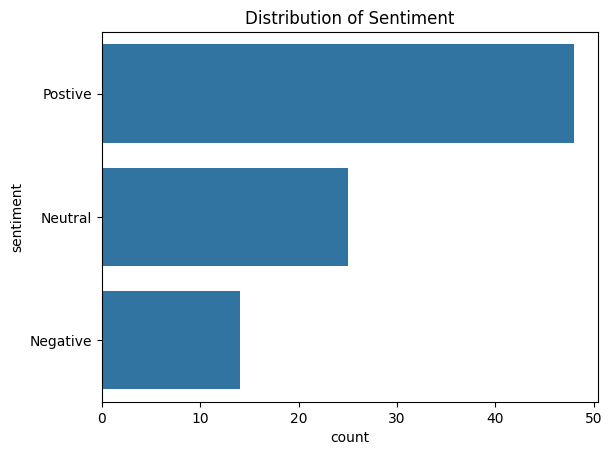

In [40]:
sns.countplot(train['sentiment']).set_title("Distribution of Sentiment")